## Notes for [scikit-learn user guide](http://scikit-learn.org/stable/user_guide.html).

## 1. Superivsed learning
### 1.1 [Generalized linear models](http://scikit-learn.org/stable/modules/linear_model.html) 
#### 1.1.1 Ordinary Least Sqaures (OLS)
$y(\omega,x)=\omega_0+\omega_1+\cdots+\omega_px_p$,
$\omega=(\omega_1,\cdots,\omega_p)$ as `coef_`, and $\omega_0$ as `intercept_`

Linear regression filts a linear model to minimize 

$\underset{w}{min\,} {|| X w - y||_2}^2$

However, coefficients estimates for OLS reply on the **independence** of the model terms. When the terms are **correlated** and the columns of the design matrix X have an approximate **linear dependence**, the desginmatrix becomes close to **singular**, and as a result, the least-square estimate becomes **highly sensitive** to random errors in the observed response, producing a **large variance**.
#### 1.1.2 Ridge Regression
Ridge regression (**L2-norm minimization**) imposes a penalyt on the size of cofficients to minimize 

$\underset{w}{min\,} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2}$

Here, $\alpha \ge 0$ controls the amount of shrinkage: the large the value of $\alpha$, the greater the amount of shrinkage and thus the cofficients become more robust to **colinearity**.

`RidgeCV` implements ridge regression with built-in cross-validation of the $\alpha$ parameter. It works in the same way as `GridSearchCV` except that it defaults to [Generalized Cross-Validation](http://cbcl.mit.edu/projects/cbcl/publications/ps/MIT-CSAIL-TR-2007-025.pdf) (GCV), an efficient form of leave-one-out corss-validation.
#### 1.1.3 Lasso
Lasso(**L1-norm minimization**) is a linear model that estimates **sparse coefficients**, effectively reducing the number of variables upon which the given solution is dependent. The objective function to minimize is:

$\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$

The $\alpha$ parameter is determined by cross-validation `LassoCV` and `LassoLarsCV` (the latter is based on the Least Angle Regression).

For **high-dimensional** datasets with many collinear regressors, `LassoCV` is most often preferable. 

`LassoLarsCV` has the advantage of exploring **more relevant** values of $\alpha$ parameter, and if the number of samples is very **small** compared to the number of observations, it is often **faster** than `LassoCV`.

`LassoLarsIC` uses the Akaike information criterion (AIC) and the Bayes information criterion (BIC). It's computationally **cheaper** (the regulation path in computed only once instead of k+1 times using k-fold cross-validation). But it needs a proper estimation of the degrees of freedom of the solution, are derived for large samples and assume the model is correct. They also tend to break when the problem is badly conditioned (more features than samples).
#### 1.1.4 Elastic Net
It's a linear regression model trained with **L1 and L2** prior as regularizer. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of L1 and L2 using the `l1_ratio` parameter. 

Elastic Net is useful when there are multiple features which are correlated with one another.

The objective function to minimize is in this case

$\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
\frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$

The class ElasticNetCV can be used to set the parameters alpha ($\alpha$) and `l1_ratio` ($\rho$) by cross-validation.
#### 1.1.5 Multi-task Lasso
A linear model to estimate sparse coefficients for multiple regression problems jointly: y is 2D array of shape (n_samples, n_tasks). The constraint is that the selected features are the same for all the regression problems. 

Mathematically, it consists of a linear model trained with a mixed **L1L2** prior as regularizer. The objective function to minimize is:

$\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X W - Y||_2 ^ 2 + \alpha ||W||_{21}}$
where
$||W||_{2 1} = \sum_i \sqrt{\sum_j w_{ij}^2}$

The implementation uses coordinate descent as the algorithm to fit the coefficients.
#### 1.1.6 Least Angle Regression (LARS)
A regression algorithm for **high-dimensional** data. Advantages:
* Numerically efficient in contexts where p>>n (i.e., number of dimensions is significantly greater than the number of points)
* Computationally as fast as forward selection, and has the same order of complexity as OLS
* Produces full piecewise linear solution path, useful in cross-validation or similar attempts to tune the model.

Because LARS is based upon an iterative refitting of the residuals, it would appear to be especially **sensitive to the effects of noise**.

The LARS model can be used using estimator `Lars`, or its low-level implementation `lars_path`.
#### 1.1.7 LARS Lasso
A Lasso model implemented using the LARS algorithm. The algorithm is similar to forward stepwise regression, but instead of including variables at each step, the estimated parameters are increased in a direction equiangular to each one's correlations with the residual. The full coefficients path is stored in the array `coef_path_`, which has size (n_features, max_features+1). The first column is always zero. Original Algorithm is detailed in the paper [Least Angle Regression](http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf) by Hastie et al.
#### 1.1.8 Logistic regression
The implementation of logistic regression in scikit-learn can be accessed from class LogisticRegression. This implementation can fit a multiclass (one-vs-rest) logistic regression with optional L2 or L1 regularization.

As an optimization problem, binary class L2 penalized logistic regression minimizes the following cost function:

$\underset{w, c}{min\,} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$ .

Similarly, L1 regularized logistic regression solves the following optimization problem

$\underset{w, c}{min\,} \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$.
#### 1.1.9 Polynomial regression
The model looks like this:

$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$

The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new variable

$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$

With this re-labeling of the data, our problem can be written

$\hat{y}(w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$

By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data. The polynomial feature can be created using `PolynomialFeatures`.

In some cases it’s not necessary to include higher powers of any single feature, but only the so-called interaction features that multiply together at most d distinct features. These can be gotten from `PolynomialFeatures` with the setting `interaction_only=True`.
### 1.2 [Linear and quadratic discriminant analysis](http://scikit-learn.org/stable/modules/lda_qda.html)
Linear discriminant analysis (`lda.LDA`) and quadratic discriminant analysis (`qda.QDA`) are two classic classifiers, with, as their names suggest, a linear and a quadratic decision surface, respectively.

These classifiers are attractive because they have **closed-form solutions** that can be **easily computed**, are inherently multiclass, and have proven to work well in practice. Also there are **no parameters to tune** for these algorithms.

`lda.LDA` can be used to perform supervised dimensionality reduction by projecting the input data to a subspace consisting of the most discriminant directions. This is implemented in `lda.LDA.transform`. The desired dimensionality can be set using the `n_components` constructor parameter. This parameter has no influence on `lda.LDA.fit` or `lda.LDA.predict`.

Both methods work by modeling the class conditional distribution of the data P(X|y=k) for each class k. Predictions can be obtained by using Bayes’ rule:

$P(y | X) = P(X | y) \cdot P(y) / P(X) = P(X | y) \cdot P(Y) / ( \sum_{y'} P(X | y') \cdot p(y'))$

In linear and quadratic discriminant analysis, $P(X|y)$ is modelled as a Gaussian distribution. In the case of LDA, the Gaussians for each class are assumed to share the same covariance matrix. This leads to a linear decision surface, as can be seen by comparing the the log-probability rations $log[P(y=k | X) / P(y=l | X)]$.

In the case of QDA, there are no assumptions on the covariance matrices of the Gaussians, leading to a quadratic decision surface.
### 1.3 [Kernel ridge regression](http://scikit-learn.org/stable/modules/kernel_ridge.html)
Combine Ridge with the kernel trick. It thus learns a linear function in the space induced by the respective kernel and the data. For non-linear kernels, this corresponds to a non-linear function in the original space.

The form of the model learned by `KernelRidge` is identical to support vector regression (SVR). However, different loss functions are used: KRR uses squared **error loss** while support vector regression uses **$\epsilon$-insensitive loss**, both combined with L2 regularization. In contrast to SVR, fitting KernelRidge can be done in **closed-form** and is typically **faster for medium-sized datasets**. On the other hand, the learned model is non-sparse and thus slower than SVR, which learns a sparse model for $\epsilon$ > 0, at prediction-time.
### 1.4 [Supporter Vector Machines (SVMs)](http://scikit-learn.org/stable/modules/svm.html)
SVMs are a set of supervised learning methods used for **classification**, **regression** and **outliers detection**.

The advantages of support vector machines are:
* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different **Kernel functions** can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:
* If the number of features is much greater than the number of samples, the method is likely to give poor performances.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation 

#### 1.4.1 Classification
`SVC`, `NuSVC` and `LinearSVC` are classes capable of perfomring multi-class classification on a dataset. They take as input two arrays: an array X of size `[n_samples, n_features]` holding the training samples, and an array y of class lablels (strings or integers), size `[n_samples]`.

`SVC` and `NuSVC` are similar methods, but accept slightly different sets of parameters and have different mathematical formulations. They implement the "one-vs-one" approch for multi-class classification. If `n_class` is the number of classes, then `n_class * (n_class - 1) / 2` classifiers are constructed and each one trains data from two classes.

`LinearSVC` is another implementation of Support Vector Classification for the case of a linear kernel. Note that `LinearSVC` does not accept keyword kernel, as this is assumed to be linear. It implements “one-vs-the-rest” multi-class strategy, thus training n_class models.

The `SV` method decision_function gives per-class scores for each sample (or a single score per sample in the binary case). When the constructor option `probability` is set to True, class membership probability estimates (from the methods `predict_proba` and `predict_log_proba`) are enabled.

In problems where it is desired to give more importance to certain classes or certain individual samples keywords `class_weight` and `sample_weight` can be used.

`SVC`, `NuSVC`, `SVR`, `NuSVR` and `OneClassSVM` implement also weights for individual samples in method fit through keyword `sample_weight`. Similar to `class_weight`, these set the parameter C for the i-th example to C * sample_weight[i].
#### 1.4.2 Regression


Computing regularization path using the LARS ...
.

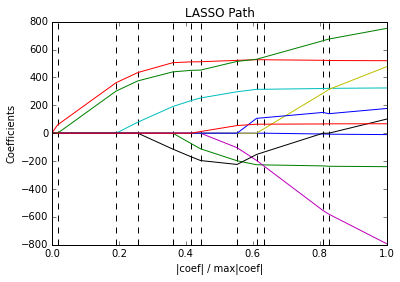

In [2]:
# Lasso path using LARS
# Author: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#         Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

print("Computing regularization path using the LARS ...")
alphas, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

C=100.00
Sparsity with L1 penalty: 6.25%
score with L1 penalty: 0.9104
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9098
C=1.00
Sparsity with L1 penalty: 9.38%
score with L1 penalty: 0.9098
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9093
C=0.01
Sparsity with L1 penalty: 85.94%
score with L1 penalty: 0.8625
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.8915


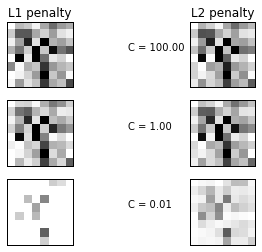

In [3]:
# L1 Penalty and Sparsity in Logistic Regression
# Authors: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Andreas Mueller <amueller@ais.uni-bonn.de>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()

X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(np.int)


# Set regularization parameter
for i, C in enumerate((100, 1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01)
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(X, y))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(X, y))

    l1_plot = plt.subplot(3, 2, 2 * i + 1)
    l2_plot = plt.subplot(3, 2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")

    l1_plot.imshow(np.abs(coef_l1_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    l2_plot.imshow(np.abs(coef_l2_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    plt.text(-8, 3, "C = %.2f" % C)

    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())

plt.show()

In [4]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.arange(6).reshape(3, 2)
poly = PolynomialFeatures(degree=2) 
print(poly.fit_transform(X))
print(X)

[[ 1  0  1  0  0  1]
 [ 1  2  3  4  6  9]
 [ 1  4  5 16 20 25]]
[[0 1]
 [2 3]
 [4 5]]


The features of X have been transformed from $[x_1, x_2]$ to $[1, x_1, x_2, x_1^2, x_1 x_2, x_2^2]$, and can now be used within any linear model.

This sort of preprocessing can be streamlined with the Pipeline tools. A single object representing a simple polynomial regression can be created and used as follows:

In [6]:
# Polynomial regression with pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3
model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_

array([ 3., -2.,  1., -1.])

In [18]:
# SVM classification
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y) 
clf.predict([[2., 2.]])
# get support vectors
clf.support_vectors_
# get indices of support vectors
clf.support_ 
# get number of support vectors for each class
clf.n_support_ 

array([1, 1], dtype=int32)

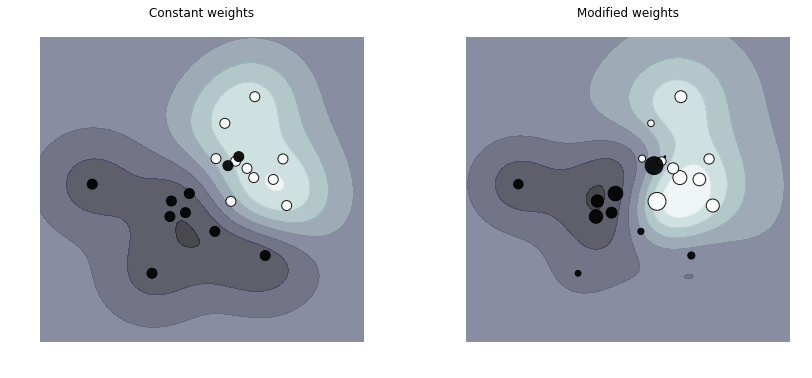

In [19]:
# SVM Weighted samples
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(X[:, 0], X[:, 1], c=Y, s=100 * sample_weight, alpha=0.9,
                 cmap=plt.cm.bone)

    axis.axis('off')
    axis.set_title(title)


# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
Y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# for reference, first fit without class weights

# fit the model
clf_weights = svm.SVC()
clf_weights.fit(X, Y, sample_weight=sample_weight_last_ten)

clf_no_weights = svm.SVC()
clf_no_weights.fit(X, Y)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(clf_no_weights, sample_weight_constant, axes[0],
                       "Constant weights")
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1],
                       "Modified weights")

plt.show()